**<font size="5"> Analysing and Cleaning the Dataset</font>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
Titanic_data=pd.read_csv(r"C:\Users\Dell\Downloads\Titanic-Dataset.csv")

In [4]:
#First Five values can be visible here
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking for the missing values
Titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#Giving all the missing values
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here the missing values are for Age, Cabin and Embarked. Computing Cabin and Embarked 
with mode as they are categorical values whereas Age is numerical value where we'll
compute it using median or mean.

In [7]:
#fill the missing values as mode in Cabin
Titanic_data["Cabin"]=Titanic_data["Cabin"].fillna(Titanic_data["Cabin"].mode()[0])

In [8]:
#fill the missing values as mode in Embarked
Titanic_data["Embarked"]=Titanic_data["Embarked"].fillna(Titanic_data["Embarked"].mode()[0])

In [9]:
#fill the missing values as median in Age
Titanic_data["Age"]=Titanic_data["Age"].fillna(Titanic_data["Age"].median())

In [10]:
#Checking if the missing values are filled or not.
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now, Clearly the missing values are removed and filled with the values appropriate for it.

In [11]:
Titanic_data.shape

(891, 12)

There are 891 rows and 12 columns in the above dataset

In [12]:
Titanic_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

The unique values in SibSp are the above one

In [13]:
Titanic_data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

The unique values in Parch are the above one

In [14]:
Titanic_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

The unique values in Embarked are S,C,Q 

In [15]:
Titanic_data["Pclass"].unique()

array([3, 1, 2])

The unique values in Pclass are 3,1,2

In [16]:
#checking for duplicates
Titanic_data.duplicated().sum()

np.int64(0)

We checked for duplicates, but no duplicate was found

**<font size="5">Encoding, Correlation and Dropping the columns</font>**

Firstly we'll encode the dataset which could be easily encoded and later on we are supposed to find the columns which are supposed to be dropped for which we need to find correlation. If correlation is more, then we can drop any one of the column which is not needed.

In [17]:
#Encoding the sex column with 0 and 1
Titanic_data["Sex_Encoded"]=Titanic_data["Sex"].astype("category").cat.codes

In [18]:
#Encode the embarked column with 0,1,2
Titanic_data["Embarked_Encoded"]=Titanic_data["Embarked"].astype("category").cat.codes

In [19]:
#finding correlation between various columns, few of the columns
#here the correlation is between "Survived" and "Parch"
correlation=Titanic_data["Survived"].corr(Titanic_data["Parch"])
correlation

np.float64(0.0816294070834836)

The correlation is 0.08 which is very less, that doesn't show collinearity

In [20]:
#correlation between "Survived" and "Sibsp"
Titanic_data["Survived"].corr(Titanic_data["SibSp"])

np.float64(-0.035322498885735576)

The correlation is -0.03 which is extremely low having very low variance

In [21]:
Titanic_data["SibSp"].corr(Titanic_data["Parch"])

np.float64(0.41483769862015646)

Here, the correlation is 0.4, and "Sibsp" and "Parch" gives us definition for "Siblings and spouse" and "parents and children" respectively. So, I combined "SibSp" with "Parch" into a new column "Family"

In [22]:
#New column Family is formed 
Titanic_data["Family"]=Titanic_data["SibSp"]+Titanic_data["Parch"]

In [23]:
#The first 5 rows depicting all columns with encoded and non-encoded columns
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Encoded,Embarked_Encoded,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0


In [24]:
#Checking the unique values in the new column formed "Family"
Titanic_data["Family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

Now, we are supposed to find the columns which are to be dropped in the dataset which aren't useful in finding which columns doesn't have effect on the people who survived or not. 


In [25]:
#Drop unnecessary columns
titanic__data=Titanic_data.drop(["PassengerId","Name","SibSp","Age","Parch","Cabin","Ticket","Sex","Embarked"],axis=1)

<br>PassengerId" should be dropped as it gives series which doesn't affect "Survived" column.</br>
"Name" should also be dropped as it doesn't affect.</br>
"Sex" should be dropped because we have another column "Sex_Encoded" which can be used in correlation and further analysis.</br>
"Ticket" should be dropped, having no effect on survival of people.</br>
"Cabin" should be dropped as it had the most number of missing values around "687".</br>
"Age" should be dropped as it also has alot of missing values around "177".</br>
"SibSp" and "Parch" should be dropped because they are combined in a single column named "Family".</br>
"Embarked" should also be dropped because we have a replaced encoded column "Embarked_Encoded".</br>

In [26]:
titanic__data

,Survived,Pclass,Fare,Sex_Encoded,Embarked_Encoded,Family
0,0,3,7.2500,1,2,1
1,1,1,71.2833,0,0,1
2,1,3,7.9250,0,2,0
3,1,1,53.1000,0,2,1
4,0,3,8.0500,1,2,0
...,...,...,...,...,...,...
886,0,2,13.0000,1,2,0
887,1,1,30.0000,0,2,0
888,0,3,23.4500,0,2,3
889,1,1,30.0000,1,0,0


In [27]:
#Correlation for each column with every column is defined here
titanic__data.corr()

,Survived,Pclass,Fare,Sex_Encoded,Embarked_Encoded,Family
Survived,1.000000,-0.338481,0.257307,-0.543351,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.549500,0.131900,0.162098,0.065997
Fare,0.257307,-0.549500,1.000000,-0.182333,-0.224719,0.217138
Sex_Encoded,-0.543351,0.131900,-0.182333,1.000000,0.108262,-0.200988
Embarked_Encoded,-0.167675,0.162098,-0.224719,0.108262,1.000000,0.066516
Family,0.016639,0.065997,0.217138,-0.200988,0.066516,1.000000


<Axes: >

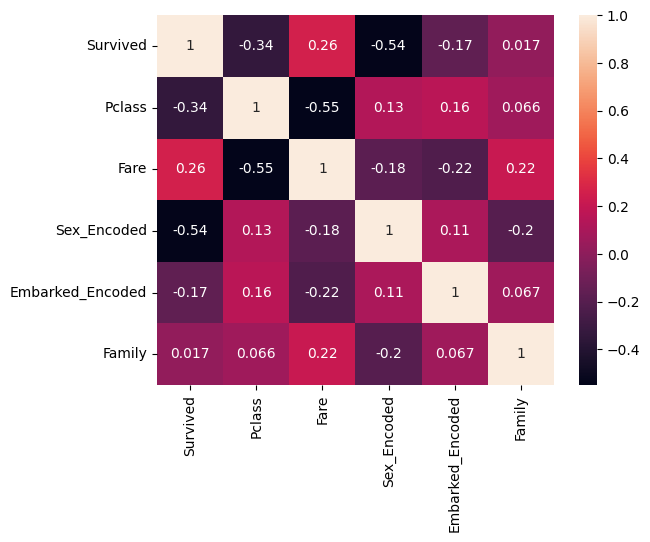

In [28]:
#Heatmap shows the correlation in visualized form
sns.heatmap(titanic__data.corr(),annot=True)


**<font size="5">Visualization</font>**

<Axes: title={'center': 'Survived'}, xlabel='Survived'>

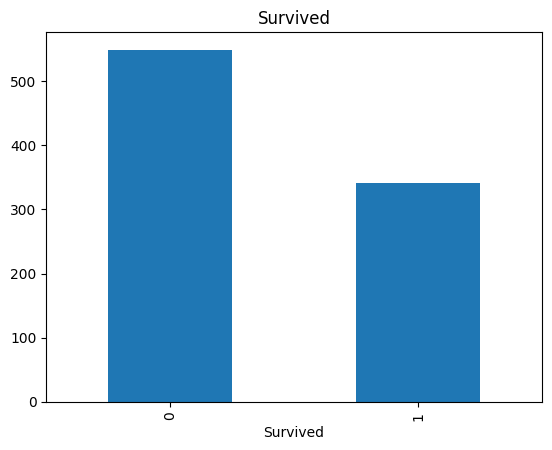

In [29]:
Titanic_data["Survived"].value_counts().plot.bar(title="Survived")

About 550 people are considered "NOT SURVIVED" AND 320 people has "SURVIVED"

<Axes: title={'center': 'Sex'}, xlabel='Sex'>

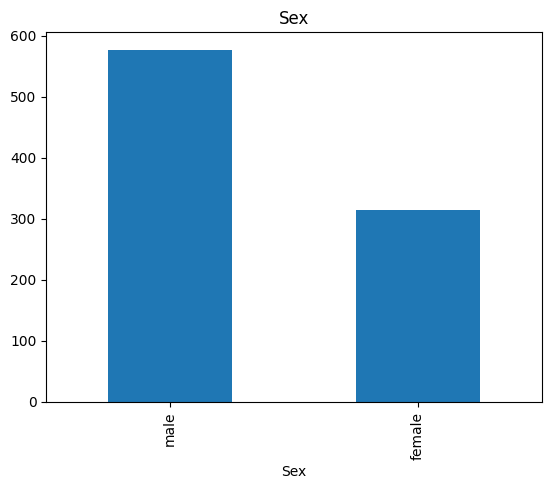

In [30]:
Titanic_data["Sex"].value_counts().plot.bar(title="Sex")


There are about 580 Male and 300 Females in the titanic dataset

<Axes: title={'center': 'Pclass'}, xlabel='Pclass'>

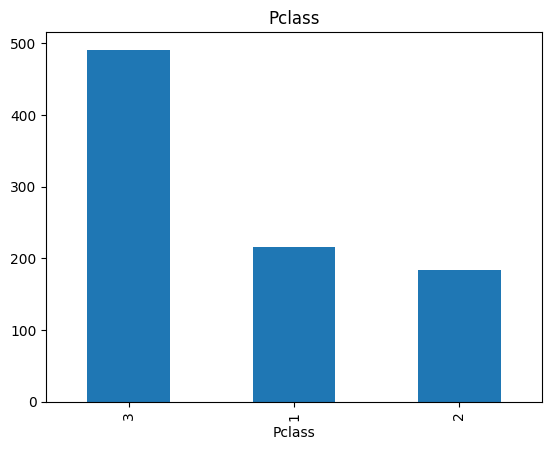

In [31]:
Titanic_data["Pclass"].value_counts().plot.bar(title="Pclass")


About 490 people belonged to Pclass 3, 200 belonged to Pclass 1 and 190 belonged to Pclass 2

<Axes: title={'center': 'SibSp'}, xlabel='SibSp'>

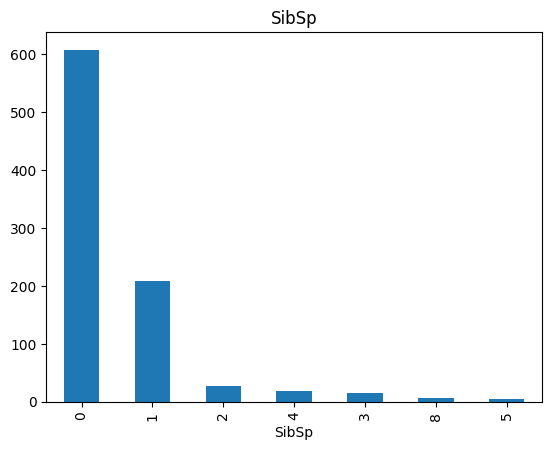

In [32]:
Titanic_data["SibSp"].value_counts().plot.bar(title="SibSp")

In Sibsp 600 people belonged to Sibp 0 , then 200 belonged to Sibsp 2 and minimum did belonged to SibSp 4,3,8 and 5

<Axes: title={'center': 'Parch'}, xlabel='Parch'>

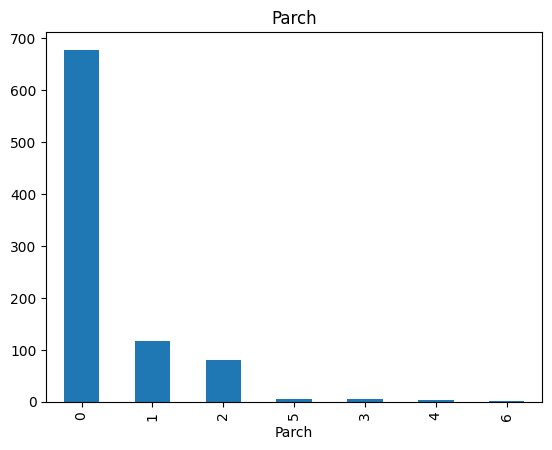

In [33]:
Titanic_data["Parch"].value_counts().plot.bar(title="Parch")

About 690 belonged to Parch 0, 110 belonged to Parch 1 , 90 belonged to Parch 2 and less than minimum did belonged to Parch 5,3,4 and 6

<Axes: title={'center': 'Embarked'}, xlabel='Embarked'>

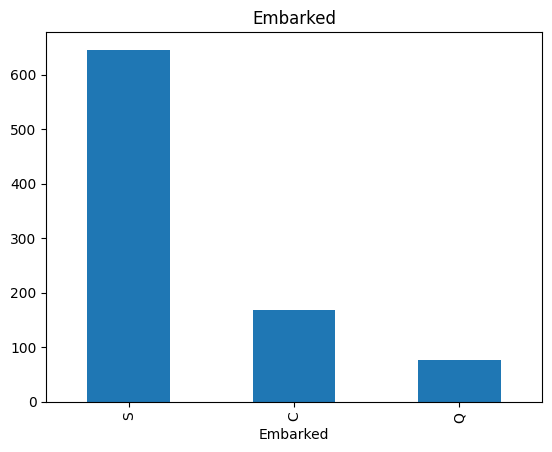

In [34]:
Titanic_data["Embarked"].value_counts().plot.bar(title="Embarked")

About 640 belonged to S, 190 to C and 50 to Q

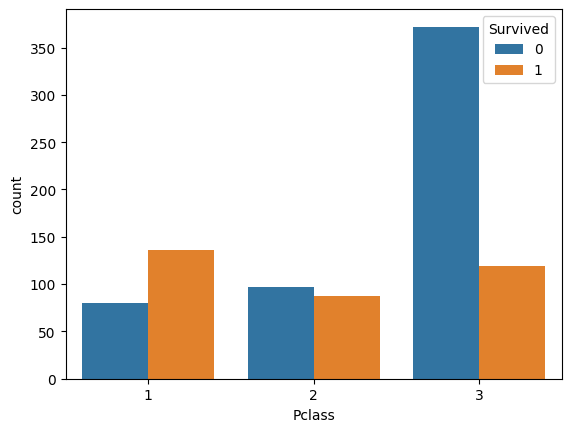

In [35]:
sns.countplot(x="Pclass",hue="Survived",data=Titanic_data)
plt.show()

Pclass 3 has maximum number of deaths whereas Pclass 1 has maximum number of people survived whereas Pclass 1 has very less death.

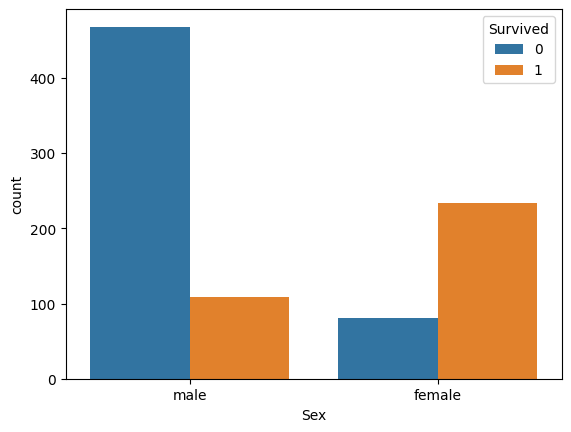

In [36]:
sns.countplot(x="Sex",hue="Survived",data=Titanic_data)
plt.show()

This Countplot shows us that number of females survived were more than that of males. The Death of males were more in Titanic accident.

**<font size="5">Feature Scaling</font>**

In [37]:
#Importing the necessary libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
x=titanic__data.drop("Survived",axis=1)

In [39]:
y=titanic__data["Survived"]

In [40]:
#Survived data is stored in y
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
#starting 5 values of x
x.head()

,Pclass,Fare,Sex_Encoded,Embarked_Encoded,Family
0,3,7.2500,1,2,1
1,1,71.2833,0,0,1
2,3,7.9250,0,2,0
3,1,53.1000,0,2,1
4,3,8.0500,1,2,0


In [42]:
#Splitting the dataset in feature class and target variable for training and testing
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [43]:
#X has data regarding Pclass,Fare,Sex_Encoded,Embarked_Encoded, family which are 5 columns
X_train.shape

(623, 5)

X has a training set with 623 rows and 5 columns

In [44]:
X_test.shape

(268, 5)

X has a testing set with 268 rows and 5 columns

In [45]:
y_train.shape

(623,)

y is a target variable having 623 values in training set

In [46]:
y_test.shape

(268,)

Y is a target variable having 268 values in its testing set

In [47]:
#Standard Scaling for the dataset
ss=StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-1.55748475,  4.3782921 , -1.34870476,  0.59587724,  2.54734826],
       [-0.36545404, -0.13581398,  0.74145212,  0.59587724,  0.67367888],
       [ 0.82657667, -0.47770513,  0.74145212,  0.59587724, -0.57543404],
       ...,
       [ 0.82657667, -0.4933388 ,  0.74145212, -1.87077737,  0.67367888],
       [ 0.82657667, -0.48341919,  0.74145212, -0.63745007, -0.57543404],
       [-1.55748475, -0.06534059,  0.74145212, -1.87077737, -0.57543404]],
      shape=(268, 5))

In the above dataset, we did scaling for the feature class X with training and testing part.

**<font size="5"> Logistic Regression Model</font>**

In [59]:
#Importing the libraries for logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [60]:
#Initialising the model
model=LogisticRegression()

In [61]:
#Fitting feature variable training data and Target variable training data
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
#Now,the predicted value for target value with respect to taking input feature variable testing data(X_test)
y_pred=model.predict(X_test)

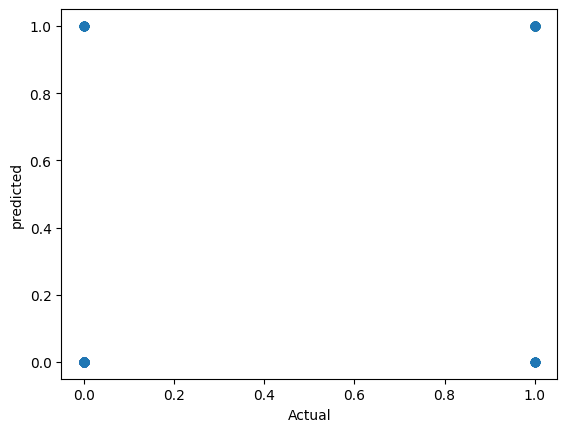

In [63]:
#plotting the scatterplot for better understanding
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Here, the actual non-survivors are at (0,0) which are correctly predicted and the survivors which are predicted correctly are(1,1) whereas at (1,0): it is predicted wrongly as the actual was the people survived but it depicted people were non-survivors. Similarly (0,1) is also wrongly predicted.

In [64]:
#Accuracy with predicted and actual value
("ACCURACY=",accuracy_score(y_test,y_pred))

('ACCURACY=', 0.7985074626865671)

In [65]:
#Confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[141,  30],
       [ 24,  73]])

In [66]:
#precision score
precision_score(y_test,y_pred)

0.7087378640776699

About 73% predicted positives were actually positives

In [67]:
#recall_score
recall_score(y_test,y_pred)

0.7525773195876289

In [68]:
#the classification report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.82      0.84       171\n           1       0.71      0.75      0.73        97\n\n    accuracy                           0.80       268\n   macro avg       0.78      0.79      0.78       268\nweighted avg       0.80      0.80      0.80       268\n'